<a href="https://colab.research.google.com/github/00150/AI_07_JYP_Project_section_02/blob/main/2022__%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98_%EB%9F%AC%EC%8B%9C%EC%95%84_%EC%A0%84%EC%9F%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## Project2. 우크라이나 러시아 전쟁 🏹

>22.02.24 개전된 전쟁은 현재까지 계속 진행중에 있습니다.<br/>
주어진 데이터를 이용하여 손실 및 앞으로의 방향을 예측해보도록 합니다.<br/>

* ✔참고 : 컬럼 별 주요 데이터 출처는 **우크라이나 군대**와 **국방부** 입니다.

#### ❗주의.
* **장비 및 인력 손실의 수**는 **러시아에만 해당**합니다.
* 우크라이나에서는 자국의 장비 및 인력 손실에 관하여 정확하게 발표하지 않았습니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 패키지 & 라이브러리 import
import pandas as pd
import numpy as np

In [3]:
url1 = '/content/drive/MyDrive/new_project02/russia_losses_equipment.csv'
url2 = '/content/drive/MyDrive/new_project02/russia_losses_personnel.csv'

In [4]:
# 데이터 불러오기
df1 = pd.read_csv(url1)

In [5]:
df1.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [6]:
# 데이터 불러오기 df2
df2 = pd.read_csv(url2)

In [7]:
df2.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0


---
### 1. Data EDA.
>분석, 예측 및 분류를 진행하기 이전에 데이터를 살펴보도록 합니다.




#### 1-1.컬럼별 데이터
> 가독성을 높히기 위하여 데이터의 컬럼을 한글로 바꿔줍니다.



In [8]:
df1.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'greatest losses direction',
       'vehicles and fuel tanks', 'cruise missiles'],
      dtype='object')

In [9]:
# 컬럼명을 변경하기 전의 이름을 보관합니다.
columns_name_not_modified = df1.columns

In [10]:
eq_df = df1.rename(columns={'date':'날짜','day':'개전일','aircraft':'항공기','helicopter':'헬리콥터','tank' : '탱크',
                    'APC':'장갑차','field artillery': '야포' ,'MRL' :'다중로켓발사기','military auto' : '자동화기기',
                    'fuel tank': '연료탱크', 'drone':'드론' ,'naval ship' : '해군함정', 'anti-aircraft warfare' : '방공포', 'special equipment' : '특수 장비',
                    'mobile SRBM system' : '자동화 탄도 미사일', 'vehicles and fuel tanks' : '탈것 및 연료탱크', 'cruise missiles' : '크루즈 미사일','greatest losses direction' : '피해가 큰 지역'})

eq_df.head()

,날짜,개전일,항공기,헬리콥터,탱크,장갑차,야포,다중로켓발사기,자동화기기,연료탱크,드론,해군함정,방공포,특수 장비,자동화 탄도 미사일,피해가 큰 지역,탈것 및 연료탱크,크루즈 미사일
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


#### df2의 데이터의 컬럼명 또한 변경합니다.

In [11]:
pp_df = df2.rename(columns={'date':'날짜', 'day':'개전일', 'personnel':'사망자 수', 'personnel*':'불확실한 사망자', 'POW':'전쟁 포로'})
pp_df

,날짜,개전일,사망자 수,불확실한 사망자,전쟁 포로
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0
...,...,...,...,...,...
160,2022-08-04,162,41500,about,NaN
161,2022-08-05,163,41650,about,NaN
162,2022-08-06,164,41900,about,NaN
163,2022-08-07,165,42200,about,NaN


#### 데이터 정제 전 중요 사항.
* 장비 및 인원의 손실수는 오직 러시아만 성립한다.
* 

참고하고 있는 url

https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war?select=russia_losses_personnel.csv <br>


https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war <br>


https://www.kaggle.com/code/piterfm/ukraine-russia-war-daily-data?scriptVersionId=102179843 <br>


---
#### 일별 데이터 생성📅
> 중복된 값들을 정제하여 일별 데이터를 생성합니다.


In [12]:
#데이터의 정보를 확인합니다.
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          165 non-null    object 
 1   개전일         165 non-null    int64  
 2   항공기         165 non-null    int64  
 3   헬리콥터        165 non-null    int64  
 4   탱크          165 non-null    int64  
 5   장갑차         165 non-null    int64  
 6   야포          165 non-null    int64  
 7   다중로켓발사기     165 non-null    int64  
 8   자동화기기       65 non-null     float64
 9   연료탱크        65 non-null     float64
 10  드론          165 non-null    int64  
 11  해군함정        165 non-null    int64  
 12  방공포         165 non-null    int64  
 13  특수 장비       146 non-null    float64
 14  자동화 탄도 미사일  36 non-null     float64
 15  피해가 큰 지역    106 non-null    object 
 16  탈것 및 연료탱크   100 non-null    float64
 17  크루즈 미사일     100 non-null    float64
dtypes: float64(6), int64(10), object(2)
memory usage: 23.3+ KB


In [13]:
pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        165 non-null    object 
 1   개전일       165 non-null    int64  
 2   사망자 수     165 non-null    int64  
 3   불확실한 사망자  165 non-null    object 
 4   전쟁 포로     62 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.6+ KB


#### 날짜 데이터는 object 형태로 되어 있습니다.
* datetime으로 변경합니다.

In [14]:
eq_df['날짜'] = pd.to_datetime(eq_df['날짜']) 
pp_df['날짜'] = pd.to_datetime(eq_df['날짜'])

---
#### 특정 컬럼을 데이터의 인덱스로 지정합니다.
* 두 개의 데이터의 모두 적용합니다.
* 적용되는 부분은 다음과 같습니다.

> 장비를 나타내는 데이터 : 날짜, 개전일, 피해가 큰 지역 <br/>

> 전쟁중 일어난 사망인원을 나타낸 데이터 : 날짜, 개전일, 불분명한 사망자 수</br>

In [15]:
# 장비 데이터 인덱스 변환
eq_df = eq_df.set_index(['날짜', '개전일','피해가 큰 지역'])

In [16]:
eq_df = eq_df.diff().fillna(eq_df).fillna(0).astype(int).reset_index()

In [17]:
eq_df.tail(20)

,날짜,개전일,피해가 큰 지역,항공기,헬리콥터,탱크,장갑차,야포,다중로켓발사기,자동화기기,연료탱크,드론,해군함정,방공포,특수 장비,자동화 탄도 미사일,탈것 및 연료탱크,크루즈 미사일
145,2022-07-20,147,Bakhmut,1,0,9,13,5,2,0,0,10,0,0,0,0,8,0
146,2022-07-21,148,Sloviansk,0,0,4,7,3,1,0,0,7,0,0,2,0,6,0
147,2022-07-22,149,Kryvyi Rih and Bakhmut,0,0,0,8,4,0,0,0,3,0,0,0,0,22,0
148,2022-07-23,150,"Kramatorsk, Kryvyi Rih and Bakhmut",0,0,4,9,1,2,0,0,1,0,0,0,0,17,0
149,2022-07-24,151,Kramatorsk,0,0,14,13,5,2,0,0,0,0,0,1,0,3,3
150,2022-07-25,152,Kramatorsk,1,0,8,8,7,2,0,0,5,0,3,0,0,9,4
151,2022-07-26,153,Bakhmut,0,1,7,9,4,1,0,0,3,0,1,2,0,3,0
152,2022-07-27,154,Kryvyi Rih,0,1,1,12,3,0,0,0,4,0,0,0,0,12,0
153,2022-07-28,155,Kryvyi Rih,0,0,4,8,11,0,0,0,3,0,0,0,0,7,0
154,2022-07-29,156,Kryvyi Rih,0,0,7,8,6,0,0,0,2,0,0,2,0,16,0


In [18]:
pp_df = pp_df.set_index(['날짜', '개전일','불확실한 사망자'])
pp_df

,,,사망자 수,전쟁 포로
날짜,개전일,불확실한 사망자,,
2022-02-25,2,about,2800,0.0
2022-02-26,3,about,4300,0.0
2022-02-27,4,about,4500,0.0
2022-02-28,5,about,5300,0.0
2022-03-01,6,about,5710,200.0
...,...,...,...,...
2022-08-04,162,about,41500,NaN
2022-08-05,163,about,41650,NaN
2022-08-06,164,about,41900,NaN


In [19]:
pp_df = pp_df.diff().fillna(pp_df).fillna(0).astype(int).reset_index()
pp_df

,날짜,개전일,불확실한 사망자,사망자 수,전쟁 포로
0,2022-02-25,2,about,2800,0
1,2022-02-26,3,about,1500,0
2,2022-02-27,4,about,200,0
3,2022-02-28,5,about,800,0
4,2022-03-01,6,about,410,200
...,...,...,...,...,...
160,2022-08-04,162,about,150,0
161,2022-08-05,163,about,150,0
162,2022-08-06,164,about,250,0
163,2022-08-07,165,about,300,0


---
#### 일별 데이터 사용 예시

In [20]:
import matplotlib.pyplot as plt
from  matplotlib import dates #날짜를 정교하게 표기하기 위함
from dateutil.relativedelta import relativedelta


# 시각화 자료 : 
fig_author = 'Jin Young'


# 날짜 시간 변경하기
fig_date = pd.Timestamp('today').date()


# 기간
period_months = 2

# 살펴볼 컬럼 지정
column_equipment = '드론'
column_date = '날짜'


In [21]:
# 살펴볼 구간만 지정하여 데이터 출력.
df_ = eq_df[[column_date, column_equipment]]

# 마지막 행 : 날짜
date_last = df_.iloc[-1][column_date]

#날짜 계산
date_first = date_last - relativedelta(months=+period_months)

####참고🎇
* 

```timedelta``` 에서 month를 계산하는 방식이 없으므로,
```relativedelta``` 함수를 이용하여 계산한다.



```
#아래와 같은 형식이 지원되지 않는다.
# month_before = (datetime.strptime(target_date, '%Y-%m-%d') - timedelta(months = 1)).strftime('%Y-%m-%d') 
```






In [22]:
date_first

Timestamp('2022-06-08 00:00:00')

In [23]:
# date_first의 값은 다음과 같습니다.
# Timestamp('2022-06-08 00:00:00')


#기준점 날짜 'date_first'를 계산하여
df_ = df_[df_[column_date]>date_first].copy()


# 각 데이터 컬럼별 리스트화
label_list = df_[column_date]
number_list = df_[column_equipment]

In [24]:
# 각 데이터 컬럼별 리스트화

# 1. 날짜
label_list = df_[column_date]

# 2. 확인하고 싶은 장비
number_list = df_[column_equipment]

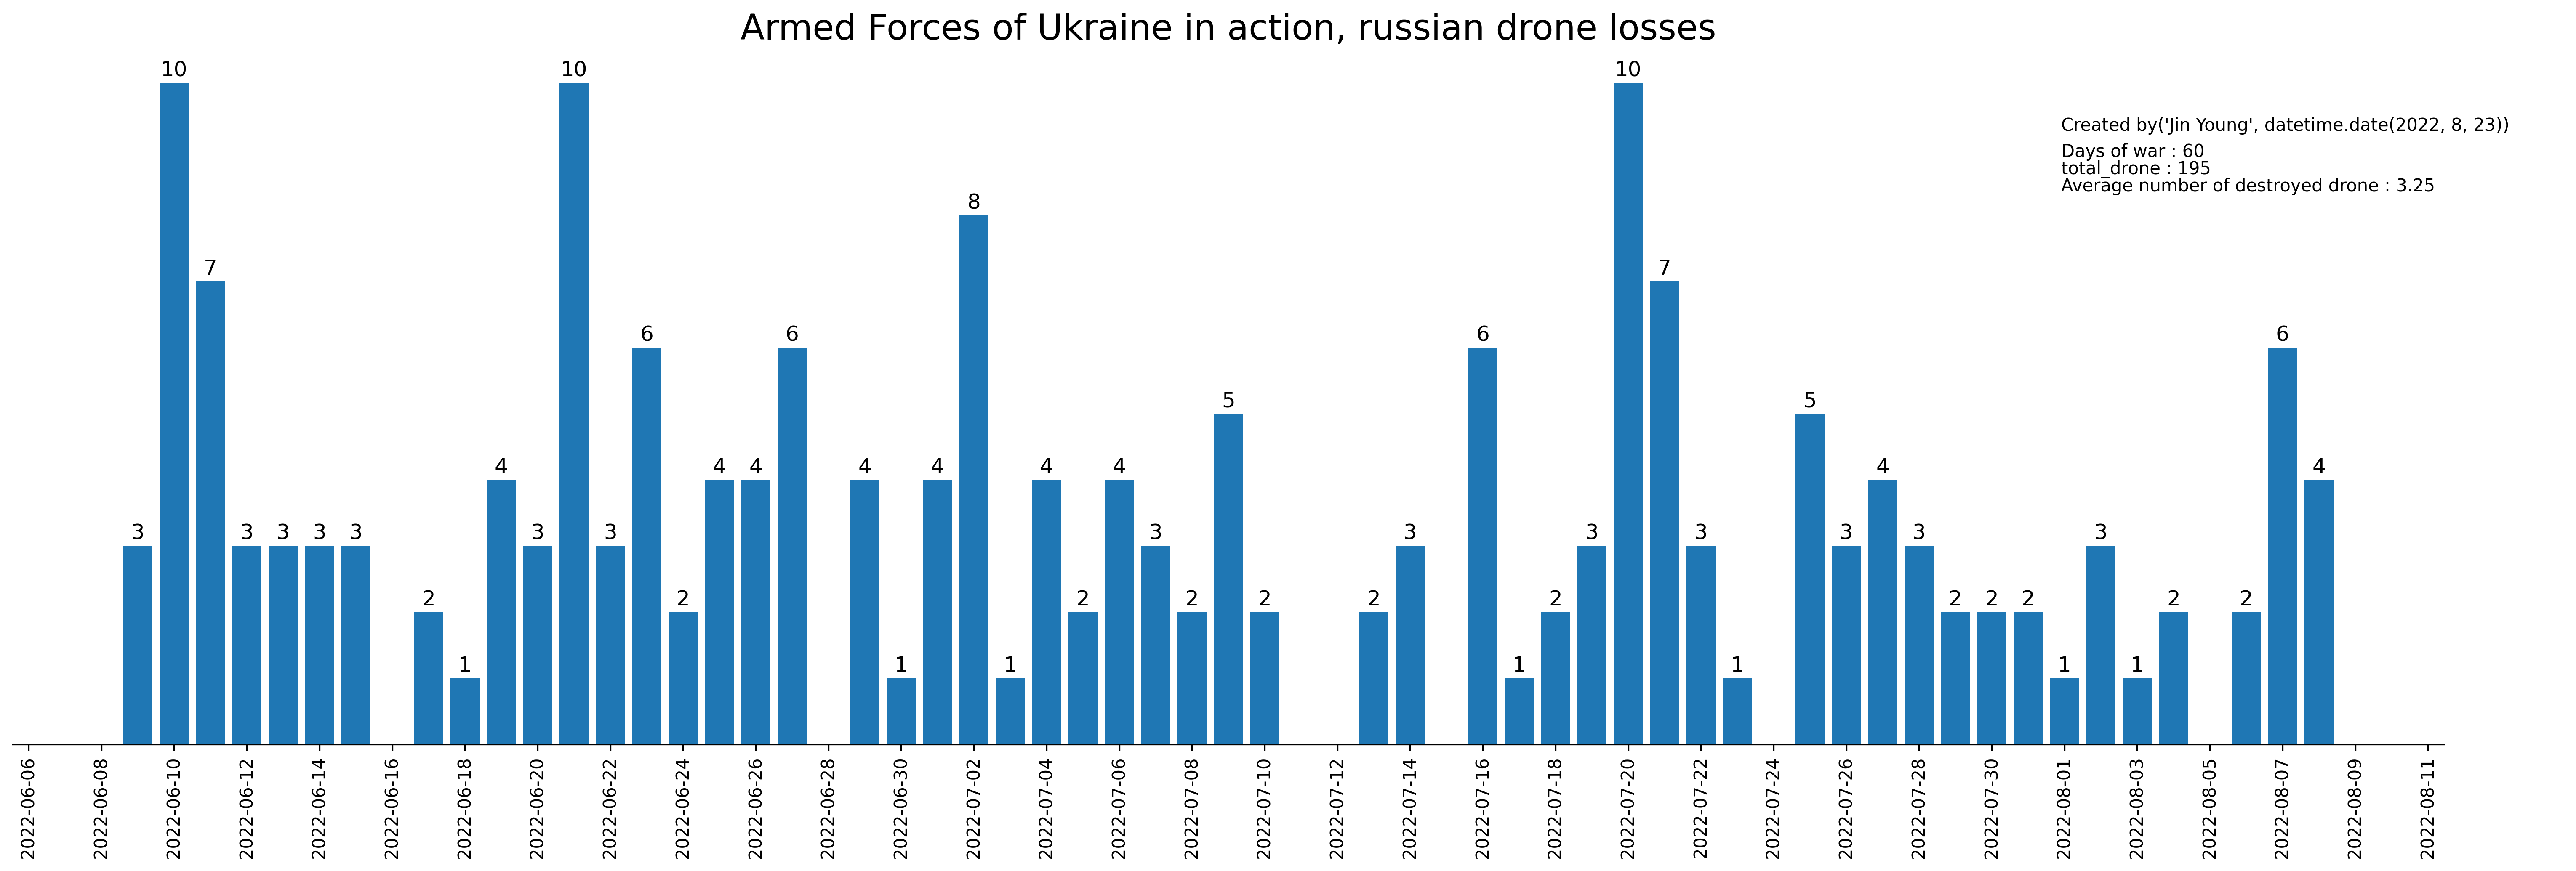

In [29]:
# 데이터 시각화

fig = plt.figure(figsize=(21,7), dpi=300)
ax = fig.add_subplot()
ax.bar(label_list, number_list)

xx =''

for patch in ax.patches:
  xx = ax.text(
      patch.get_x()+patch.get_width()/2,
      patch.get_height()+0.1,
      patch.get_height() if patch.get_height() !=0 else'',
      ha = 'center',
      fontsize=12
  )
  


#눈금 레이블 및 눈금선의 모양 변경 => tick_params
ax.tick_params(axis = 'x', labelrotation=90)


# 눈금 표시기의 위치 설정
ax.xaxis.set_major_locator(dates.DayLocator(interval=2))

# 각 눈금레이블을  그릴지에 대한 여부이다.(parameter = labelleft)
ax.tick_params(labelleft=False)

# 눈금 위치 설정 (parameter= left, right, both, default, none)
# none 및 both는 레이블이 아닌 눈금에만 영향을 줍니다.
# none : 두 위치의 눈금, 왼쪽의 레이블, 틱을 원하지 않을 때 사용합니다.
# both : 눈금이 두 위치에 모두 나타나도록 사용하지만, 눈금 레이블은 변경하지 않습니다.
ax.yaxis.set_ticks_position('none')

# ax.spines : 데이터 플롯 영역을 제한하는 선이다, 상황에 따라 일부를 제거하거나, 색상을 변경하거나, 보이지 않게 또는 너비/스타일 조절 등이 가능...
# ax.spines[원하는위치]
# set_visible (가시성 설정)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)




# 텍스트 추가
# 2022년 06월 08일부터 2022 08월 09일까지 파괴된 드론의 수 (러시아)
total_drone = df_['드론'].sum()


# 표에서 나타난 개전일
early = df_.at[104,'날짜']


# 날짜
latest = df_.at[164,'날짜']


# 총 개전일 
period = (latest - early).days


# pyplot으로 주석을 나타내는 annotate를 사용해보기. 
ax.annotate(f'Created by{fig_author, fig_date}', xy=(0.8, 0.85), xycoords = 'figure fraction')
ax.annotate(f'Days of war : {period}', xy=(0.8, 0.82), xycoords = 'figure fraction')
ax.annotate(f'total_drone : {total_drone}', xy=(0.8, 0.8), xycoords = 'figure fraction')
ax.annotate(f'Average number of destroyed drone : {total_drone / period }',xy=(0.8, 0.78),xycoords = 'figure fraction')


# 제목
plt.title(f'Armed Forces of Ukraine in action, russian drone losses',fontsize=20)


# tight_layout() : 서브플롯 사이 패딩 값 조정
plt.tight_layout()


# savefig 현재 그림 저장
# plt.savefig('{}.png'.format(column_equipment))


#출력 
plt.show()

3.25